<a href="https://colab.research.google.com/github/pannavich/2143488_Big_Data_and_AI/blob/main/HW4_Logistic-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/Big Data AI/HW3/HW3_movie_metadata.csv')
df_copy = pd.read_csv('drive/MyDrive/Big Data AI/HW3/HW3_movie_metadata.csv')
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [ ]:
df.dtypes

director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
d

In [ ]:
df.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
def numerical(df):
  drop = []
  for col in df:
    if df[col].dtypes==object:
      drop.append(col)
  numerical_df = df.drop(drop,axis=1)
  return numerical_df

numerical_df = numerical(df)
numerical_df.dtypes




num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

In [ ]:
numerical_df = numerical_df.fillna(numerical_df.mean())
numerical_df.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
def normalize(df):
  return (df-df.min())/(df.max()-df.min())

normalized_df = normalize(numerical_df)
normalized_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,0.171422,0.198812,0.029848,0.028044,0.010250,0.063732,0.049512,0.014769,0.031888,0.053720,0.003254,0.864705,0.012057,0.612929,0.070203,0.021564
std,0.149011,0.049920,0.121051,0.072228,0.023454,0.081739,0.081956,0.027658,0.046767,0.074559,0.016029,0.123403,0.029469,0.142420,0.090362,0.055359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060345,0.170635,0.000304,0.005848,0.000962,0.011125,0.005083,0.002149,0.000000,0.012651,0.000573,0.830000,0.002051,0.531646,0.045209,0.000000
50%,0.135468,0.190476,0.002261,0.016261,0.001545,0.049220,0.020331,0.004705,0.023256,0.030836,0.001883,0.890000,0.004350,0.632911,0.070203,0.000476
75%,0.237685,0.220238,0.009478,0.027739,0.017188,0.067530,0.056993,0.020947,0.046512,0.063847,0.003275,0.950000,0.006708,0.708861,0.078947,0.008596
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
normalized_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0.889163,0.339286,0.000000,0.037174,0.001563,1.000000,0.524453,0.007361,0.000000,0.603479,1.940156e-02,0.930000,0.006832,0.797468,0.040486,0.094556
1,0.370690,0.321429,0.024478,0.043478,0.062500,0.406840,0.278865,0.073622,0.000000,0.244515,2.455894e-02,0.910000,0.036496,0.696203,0.078947,0.000000
2,0.740148,0.279762,0.000000,0.007000,0.017188,0.263080,0.163256,0.017816,0.023256,0.196284,2.005647e-02,0.990000,0.002869,0.658228,0.078947,0.243553
3,1.000000,0.311508,0.956522,1.000000,0.042188,0.589253,0.677216,0.162561,0.000000,0.533702,2.046578e-02,0.960000,0.167883,0.873418,0.078947,0.469914
4,0.171422,0.198812,0.005696,0.028044,0.000205,0.063732,0.000002,0.000218,0.000000,0.053720,3.254259e-03,0.864705,0.000088,0.696203,0.070203,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,0.000000,0.158730,0.000087,0.013826,0.000995,0.063732,0.000369,0.003476,0.046512,0.000988,3.254259e-03,0.970000,0.003431,0.772152,0.070203,0.000241
5039,0.051724,0.071429,0.029848,0.013870,0.001314,0.063732,0.043695,0.002669,0.023256,0.070765,3.254259e-03,0.864705,0.004328,0.746835,1.000000,0.091691
5040,0.014778,0.136905,0.000000,0.000000,0.000000,0.063732,0.000020,0.000000,0.000000,0.000395,9.676231e-08,0.970000,0.000000,0.594937,0.070203,0.000046
5041,0.016010,0.184524,0.000000,0.021261,0.001478,0.000014,0.000740,0.003633,0.116279,0.001581,3.254259e-03,0.960000,0.005248,0.594937,0.078947,0.001891


In [ ]:
normalized_df['imdb_score'].describe()

count    5043.000000
mean        0.612929
std         0.142420
min         0.000000
25%         0.531646
50%         0.632911
75%         0.708861
max         1.000000
Name: imdb_score, dtype: float64

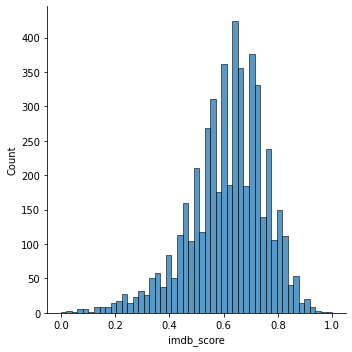

In [ ]:
sns.displot(normalized_df, x="imdb_score")

In [ ]:
print('40th percentile: '+str(np.percentile(normalized_df['imdb_score'],40)))
print('60th percentile: '+str(np.percentile(normalized_df['imdb_score'],60)))

40th percentile: 0.5949367088607593
60th percentile: 0.6582278481012657


In [ ]:
#cut out samples which has imdb_score between 40th-60th percentile

In [ ]:
def cut_middle(df,col='imdb_score'):
  upper = np.percentile(df[col],60)
  lower = np.percentile(df[col],40)
  df1=df.loc[df[col]>=upper]
  df2=df.loc[df[col]<=lower]
  return lower,upper,pd.concat([df1,df2])

lower,upper,cut_middle = cut_middle(normalized_df)
cut_middle

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0.889163,0.339286,0.000000,0.037174,0.001563,1.000000,0.524453,0.007361,0.000000,0.603479,1.940156e-02,0.930000,0.006832,0.797468,0.040486,0.094556
1,0.370690,0.321429,0.024478,0.043478,0.062500,0.406840,0.278865,0.073622,0.000000,0.244515,2.455894e-02,0.910000,0.036496,0.696203,0.078947,0.000000
2,0.740148,0.279762,0.000000,0.007000,0.017188,0.263080,0.163256,0.017816,0.023256,0.196284,2.005647e-02,0.990000,0.002869,0.658228,0.078947,0.243553
3,1.000000,0.311508,0.956522,1.000000,0.042188,0.589253,0.677216,0.162561,0.000000,0.533702,2.046578e-02,0.960000,0.167883,0.873418,0.078947,0.469914
4,0.171422,0.198812,0.005696,0.028044,0.000205,0.063732,0.000002,0.000218,0.000000,0.053720,3.254259e-03,0.864705,0.000088,0.696203,0.070203,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,0.171422,0.152778,0.000217,0.000522,0.000033,0.063732,0.000089,0.000094,0.046512,0.000395,3.254259e-03,0.880000,0.000146,0.569620,0.070203,0.000063
5031,0.014778,0.148810,0.005217,0.003652,0.001227,0.063732,0.000076,0.001692,0.031888,0.001384,1.635480e-05,0.960000,0.000715,0.481013,1.000000,0.001215
5034,0.041872,0.144841,0.000000,0.000000,0.000000,0.000092,0.000346,0.000000,0.000000,0.006721,5.551963e-07,0.890000,0.000000,0.594937,0.070203,0.000212
5040,0.014778,0.136905,0.000000,0.000000,0.000000,0.063732,0.000020,0.000000,0.000000,0.000395,9.676231e-08,0.970000,0.000000,0.594937,0.070203,0.000046


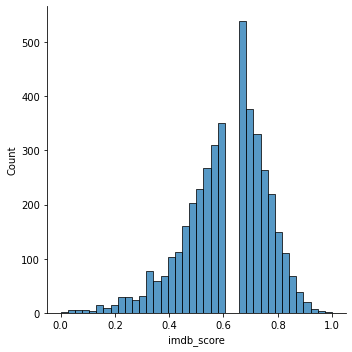

In [ ]:
sns.displot(cut_middle, x="imdb_score")

In [ ]:
pd.cut(cut_middle['imdb_score'],bins=[0,0.6,1],labels=['low','high'])

0       high
1       high
2       high
3       high
4       high
        ... 
5030     low
5031     low
5034     low
5040     low
5041     low
Name: imdb_score, Length: 4248, dtype: category
Categories (2, object): ['low' < 'high']

In [ ]:
def label(df,col='imdb_score'):
  for i in df.index:
    if df.at[i,col]>=0.6:
      df.loc[i,col]='high'
    else:
      df.loc[i,col]='low'
  

label(cut_middle)
cut_middle

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0.889163,0.339286,0.000000,0.037174,0.001563,1.000000,0.524453,0.007361,0.000000,0.603479,1.940156e-02,0.930000,0.006832,high,0.040486,0.094556
1,0.370690,0.321429,0.024478,0.043478,0.062500,0.406840,0.278865,0.073622,0.000000,0.244515,2.455894e-02,0.910000,0.036496,high,0.078947,0.000000
2,0.740148,0.279762,0.000000,0.007000,0.017188,0.263080,0.163256,0.017816,0.023256,0.196284,2.005647e-02,0.990000,0.002869,high,0.078947,0.243553
3,1.000000,0.311508,0.956522,1.000000,0.042188,0.589253,0.677216,0.162561,0.000000,0.533702,2.046578e-02,0.960000,0.167883,high,0.078947,0.469914
4,0.171422,0.198812,0.005696,0.028044,0.000205,0.063732,0.000002,0.000218,0.000000,0.053720,3.254259e-03,0.864705,0.000088,high,0.070203,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,0.171422,0.152778,0.000217,0.000522,0.000033,0.063732,0.000089,0.000094,0.046512,0.000395,3.254259e-03,0.880000,0.000146,low,0.070203,0.000063
5031,0.014778,0.148810,0.005217,0.003652,0.001227,0.063732,0.000076,0.001692,0.031888,0.001384,1.635480e-05,0.960000,0.000715,low,1.000000,0.001215
5034,0.041872,0.144841,0.000000,0.000000,0.000000,0.000092,0.000346,0.000000,0.000000,0.006721,5.551963e-07,0.890000,0.000000,low,0.070203,0.000212
5040,0.014778,0.136905,0.000000,0.000000,0.000000,0.063732,0.000020,0.000000,0.000000,0.000395,9.676231e-08,0.970000,0.000000,low,0.070203,0.000046


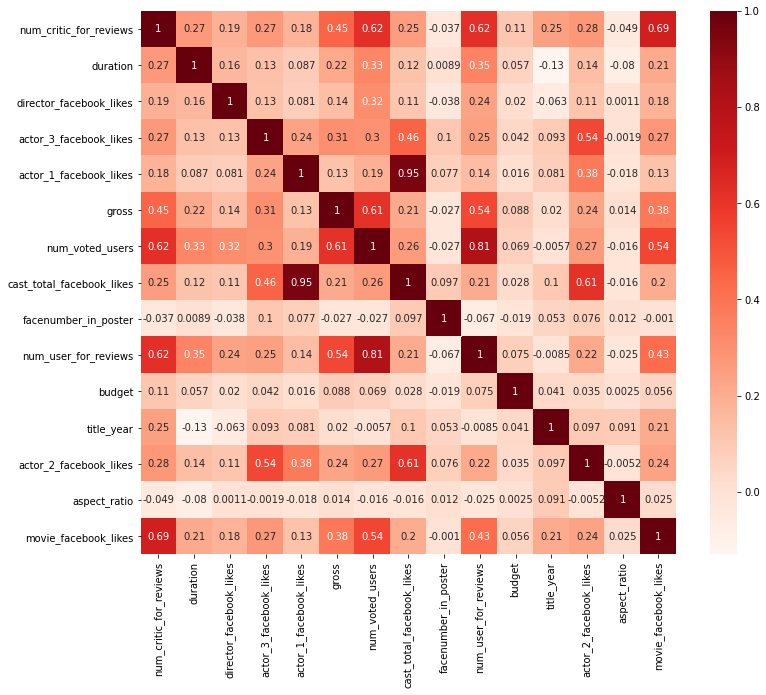

In [ ]:
plt.figure(figsize=(12,10))
corr = cut_middle.corr()
sns.heatmap(corr,annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_matrix = cut_middle.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
to_drop

['num_voted_users',
 'cast_total_facebook_likes',
 'num_user_for_reviews',
 'actor_2_facebook_likes',
 'movie_facebook_likes']

In [ ]:
#we should drop these x
for col in to_drop:
  cut_middle=cut_middle.drop(col,axis=1)

cut_middle    

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,budget,title_year,imdb_score,aspect_ratio
0,0.889163,0.339286,0.000000,0.037174,0.001563,1.000000,0.000000,1.940156e-02,0.930000,high,0.040486
1,0.370690,0.321429,0.024478,0.043478,0.062500,0.406840,0.000000,2.455894e-02,0.910000,high,0.078947
2,0.740148,0.279762,0.000000,0.007000,0.017188,0.263080,0.023256,2.005647e-02,0.990000,high,0.078947
3,1.000000,0.311508,0.956522,1.000000,0.042188,0.589253,0.000000,2.046578e-02,0.960000,high,0.078947
4,0.171422,0.198812,0.005696,0.028044,0.000205,0.063732,0.000000,3.254259e-03,0.864705,high,0.070203
...,...,...,...,...,...,...,...,...,...,...,...
5030,0.171422,0.152778,0.000217,0.000522,0.000033,0.063732,0.046512,3.254259e-03,0.880000,low,0.070203
5031,0.014778,0.148810,0.005217,0.003652,0.001227,0.063732,0.031888,1.635480e-05,0.960000,low,1.000000
5034,0.041872,0.144841,0.000000,0.000000,0.000000,0.000092,0.000000,5.551963e-07,0.890000,low,0.070203
5040,0.014778,0.136905,0.000000,0.000000,0.000000,0.063732,0.000000,9.676231e-08,0.970000,low,0.070203


Fold1


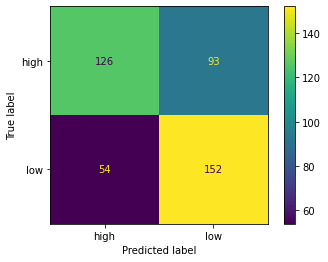

Accuracy :0.6541176470588236
-----------------------------------
Fold2


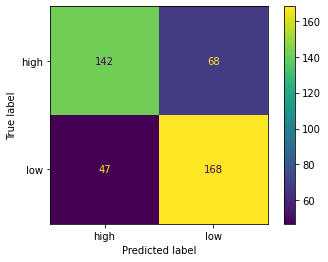

Accuracy :0.7294117647058823
-----------------------------------
Fold3


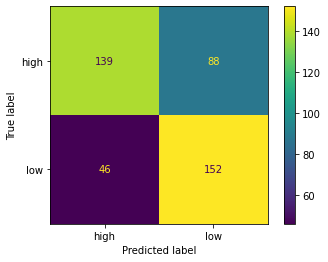

Accuracy :0.6847058823529412
-----------------------------------
Fold4


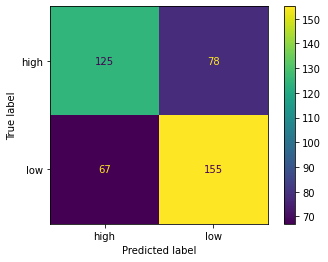

Accuracy :0.6588235294117647
-----------------------------------
Fold5


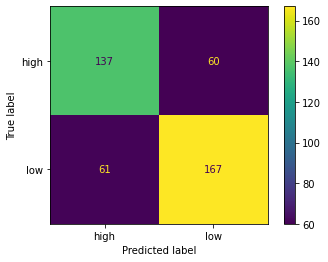

Accuracy :0.7152941176470589
-----------------------------------
Fold6


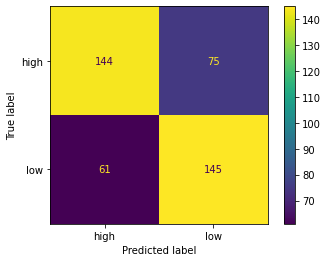

Accuracy :0.68
-----------------------------------
Fold7


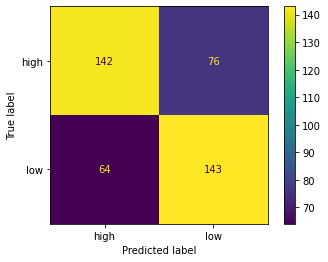

Accuracy :0.6705882352941176
-----------------------------------
Fold8


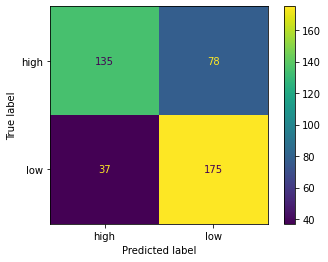

Accuracy :0.7294117647058823
-----------------------------------
Fold9


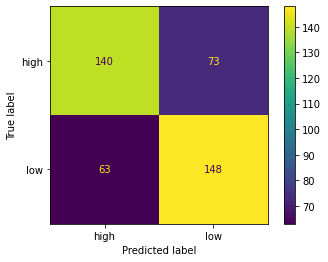

Accuracy :0.6792452830188679
-----------------------------------
Fold10


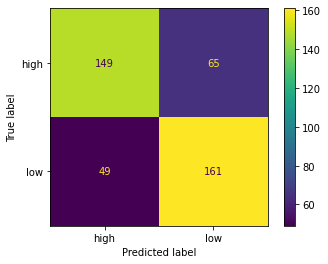

Accuracy :0.7311320754716981
-----------------------------------
Average Accuracy: 0.6932730299667036


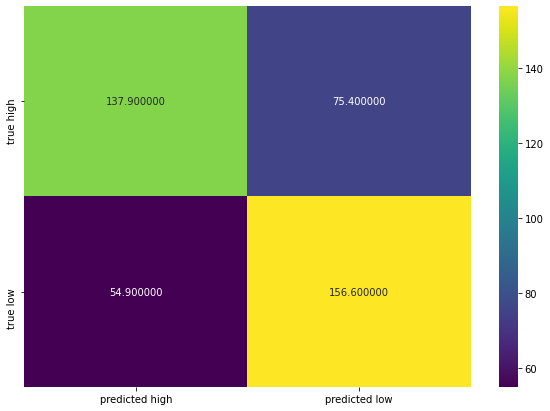

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
X = cut_middle.drop('imdb_score',axis=1)
y = cut_middle['imdb_score']

model = LogisticRegression()
kf = KFold(n_splits=10,shuffle=True) 
accs=[]
cms=[]
count = 1
for train_index, test_index in kf.split(X):
      # print("Train:", train_index.size, "Test:",test_index.size)
      X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      acc = model.score(X_test, y_test)
      cm = confusion_matrix(y_test, y_pred)
      print('Fold'+str(count))
      count=count+1
      plot_confusion_matrix(model,X_test, y_test,values_format='d')
      plt.show()  
      # print(cm)
      print('Accuracy :'+str(acc))
      accs.append(acc)
      cms.append(cm)
      print('-----------------------------------')
print('Average Accuracy: '+str(np.mean(accs)))
total_matrix=[[0,0],[0,0]]
for i in cms:
  total_matrix=total_matrix+i
mean_matrix = total_matrix/10
mean_cm = pd.DataFrame(mean_matrix,index=['true high','true low'],columns=['predicted high','predicted low'])
plt.figure(figsize = (10,7))
sns.heatmap(mean_cm, annot=True,fmt='f',cmap='viridis')


